In [ ]:

# Imports

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

import nltk

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load & clean column name

df = pd.read_csv('data/spam.csv', encoding='latin-1')

# Keeping label & message columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("First 5 rows:")
print(df.head())

print("\nLabel distribution:")
print(df['label'].value_counts(normalize=True))

First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


In [4]:

#  Simple text cleaning 

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                           
    text = re.sub(r'[^a-z ]', '', text)           
    words = text.split()                          
    clean_words = []
    for word in words:
        if word not in stop_words:
            clean_words.append(word)
    return ' '.join(clean_words)                 

df['clean_message'] = df['message'].apply(clean_text)

print("\nExample cleaned message:")
print(df['clean_message'].iloc[0])


Example cleaned message:
go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [5]:

# Prepare X & y + split + vectorize

X = df['clean_message']
y = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

In [6]:

# Naive Bayes (Model 1)

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("Naive Bayes Accuracy  :", round(accuracy_score(y_test, y_pred_nb), 4))
print("\nNaive Bayes Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam']))

Naive Bayes Accuracy  : 0.9713

Naive Bayes Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [7]:

# Logistic Regression (Model 2)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

print("Logistic Regression Accuracy  :", round(accuracy_score(y_test, y_pred_lr), 4))
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Ham', 'Spam']))

Logistic Regression Accuracy  : 0.9695

Logistic Regression Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.98      0.79      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



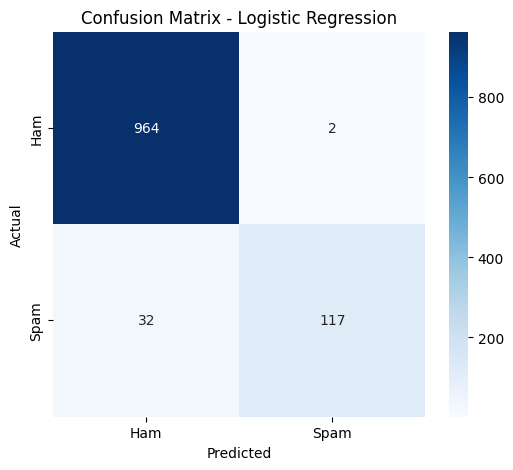

In [ ]:

# Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()